In [1]:
import os
import math
from octree_with_nodes import OctreeNode
from octree_with_nodes import Octree
from octree_with_nodes import Point
from octree_with_nodes import Rectangle
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
import numpy as np
from PIL import Image

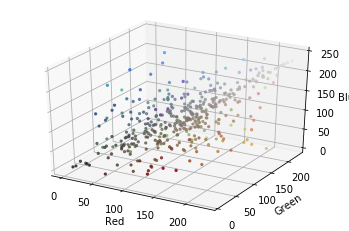

In [2]:
allImages = './Stock Pictures'
mainImage = './main_image/'
files = [os.path.join(allImages,f) for f in os.listdir(allImages) if os.path.isfile(os.path.join(allImages,f))]
mainFile = [os.path.join(mainImage,f) for f in os.listdir(mainImage) if os.path.isfile(os.path.join(mainImage,f))]

# print("done getting images")

sizeMainImg = 640,640
sizeAllImg = 150,150

redList = []
greenList = []
blueList = []
rgbList = []
colors = []
imgDict = {}

fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d") # 3D plot with scalar values in each axis

boundary = Rectangle(127.5,127.5,127.5,127.5,127.5)
tree = Octree(boundary,math.ceil(len(files)/10))

for i,file in enumerate(files):
    redAve = 0
    greenAve = 0
    blueAve = 0
    count = 0
    
    im = Image.open(file)
    im.thumbnail(sizeAllImg, Image.ANTIALIAS)
    imgArr = np.asarray(im)

    for x in range(0, imgArr.shape[0]-1):
        for y in range(0, imgArr.shape[1]-1):
#             print(imgArr[x,y][0],imgArr[x,y][1],imgArr[x,y][2])
            redAve += imgArr[x,y][0]
            greenAve += imgArr[x,y][1]
            blueAve += imgArr[x,y][2]
    
    redAve = int(round(redAve/(imgArr.shape[0]*imgArr.shape[1])))
    blueAve = int(round(blueAve/(imgArr.shape[0]*imgArr.shape[1])))
    greenAve = int(round(greenAve/(imgArr.shape[0]*imgArr.shape[1])))
    
#     print("\n\nAdding new Point")
    tree.newPoint(Point(redAve,greenAve,blueAve))
    
    rgb2hex = lambda r,g,b: f"#{r:02x}{g:02x}{b:02x}"
    colors.append(rgb2hex(redAve,greenAve,blueAve))
    
    imgDict[colors[i]] = file
#     print(65536 * redAve + 256 * greenAve + blueAve, redAve,greenAve,blueAve)
    
    redList.append(redAve)
    greenList.append(greenAve)
    blueList.append(blueAve)

# print("\ndone getting pixel color averages")

im = Image.open(mainFile[0])
im.thumbnail(sizeMainImg, Image.ANTIALIAS)

r, g, b = list(im.getdata(0)), list(im.getdata(1)), list(im.getdata(2))

axis.scatter(redList, greenList, blueList, c=colors,marker=".")
# axis.scatter(list(im.getdata(0)), list(im.getdata(1)), list(im.getdata(2)), c="black", marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()

# print("done plotting both sets of color pixels")


In [3]:
root = tree.node
root.getTotalPoints(root)

400

In [4]:
# point = Point()
# closestPoint = root.closestImageRGB(root,point)
width,height = im.size
print(width,height)
print(width * height)

# im = im.frombytes("RGB", (width, height), im)
# im.data

413 640
264320


In [5]:
imgArr = np.asarray(im)
closestPoint = []

# for i in range(0, arr.shape[0]-1):
#     for j in range(0, arr.shape[1]-1):
#         closestPoint.append(root.closestImageRGB(root,Point(arr[i,j][0],arr[i,j][1],arr[i,j][2])))
#         print("\n\n")

# for i in range(0, arr.shape[0]-1):
#     for j in range(0, arr.shape[1]-1):
#         closestPoint.append(root.closestImageRGB(root,Point(arr[i,j][0],arr[i,j][1],arr[i,j][2])))
#         print(arr[i,j][0],arr[i,j][1],arr[i,j][2])

point = root.closestImageRGB(root,Point(imgArr[0,0][0],imgArr[0,0][1],imgArr[0,0][2]))
print(imgArr[0,0][0],imgArr[0,0][1],imgArr[0,0][2])
print(point.x,point.y,point.z)
        
        

corresponding quad found
43.497126341863094 53 98 143
91.22499657440389 99 123 136
30.528675044947494 41 110 213
87.21238444166057 93 127 158
67.17886572427373 76 118 145
85.7962703152066 92 126 145
54.506880299646575 64 97 152
85.7962703152066 92 126 144
32.54228019054596 42 99 146
79.7370679169983 85 127 142
96.8039255402383 104 125 149
64.1404708432983 75 103 131
60.398675482166 67 122 203
113.57816691600547 121 126 131
69.80687645210892 76 88 128
86.6371744691619 95 121 153
55.17245689653489 65 98 176
95.0946896519464 106 109 129
111.6422858956229 119 126 132
57.367238037053866 40 71 144
16.822603841260722 0 115 160
110.0817877761803 117 85 150
101.31140113531151 103 76 149
107.15876072445033 110 77 137
95.51439682058407 106 113 137
94.53570753953238 104 118 160
55.883808030591474 60 125 128
11 106 213
0 115 160


In [28]:
print(imgDict[rgb2hex(point.x,point.y,point.z)])

./Stock Pictures\wildfireresources random (102).jpg
